## 1. SETUP

In [1]:
apikey = '' #Correspondiente a binance
secret = '' #Correspondinte a binance

In [2]:
# !pip install python-binance pandas mplfinance

In [ ]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

## 2. Authenticate

In [4]:
client = Client(apikey, secret)

## 3. Get Tickers

In [22]:
tickers = client.get_all_tickers()
tickers[0:2]

[{'symbol': 'ETHBTC', 'price': '0.07468300'},
 {'symbol': 'LTCBTC', 'price': '0.00355400'}]

In [19]:
tickers_df = pd.DataFrame(tickers)
tickers_df.head()

,symbol,price
0,ETHBTC,0.07467600
1,LTCBTC,0.00355400
2,BNBBTC,0.01099100
3,NEOBTC,0.00068700
4,QTUMETH,0.00351600


In [7]:
tickers_df.set_index('symbol', inplace=True)
tickers_df.head()

,price
symbol,
ETHBTC,0.07469500
LTCBTC,0.00356000
BNBBTC,0.01097000
NEOBTC,0.00068800
QTUMETH,0.00354000


In [8]:
tickers_df.loc['ETHUSDT']

price    4088.39000000
Name: ETHUSDT, dtype: object

## 4. Get Depth

In [9]:
depth = client.get_order_book(symbol='ETHUSDT')

In [10]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volumne']
depth_df.head()

,Price,Volumne
0,4087.42000000,3.78460000
1,4087.48000000,0.47190000
2,4087.70000000,1.22240000
3,4087.76000000,0.27090000
4,4087.78000000,0.74510000


## 5. Get Historical Data

In [11]:
#[
#    [
#        1499040000000,      # Open time
#        "0.01634790",       # Open
#        "0.80000000",       # High
#        "0.01575800",       # Low
#        "0.01577100",       # Close
#        "148976.11427815",  # Volume
#        1499644799999,      # Close time
#        "2434.19055334",    # Quote asset volume
#        308,                # Number of trades
#        "1756.87402397",    # Taker buy base asset volume
#        "28.46694368",      # Taker buy quote asset volume
#        "17928899.62484339" # Can be ignored
#    ]
#]

In [12]:
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [14]:
hist_df = pd.DataFrame(historical)
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,22262.26697743
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,22275.36801826
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,22295.47295841
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,22165.74281157
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,22505.62469176


In [15]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,22262.26697743
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,22275.36801826
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,22295.47295841
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,22165.74281157
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,22505.62469176


## 6. Preprocess Historical Data

In [17]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [23]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [24]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [26]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

## 7. Visualization

In [27]:
import mplfinance as mpf

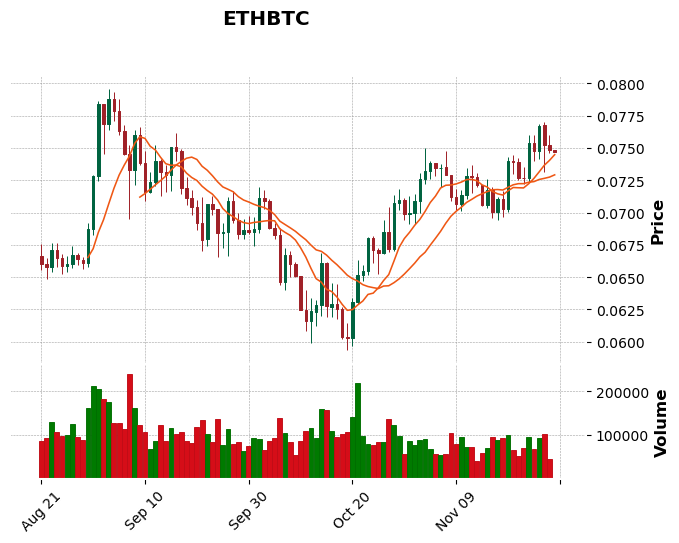

In [37]:
mpf.plot(hist_df.set_index('Close Time').tail(100),
        type='candle', style='charles', volume=True,
        title='ETHBTC',
        mav=(10,20))